In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from scipy import stats

1. Read a csvfile into a dataframe

In [4]:
# Read a csvfile into a dataframe
diab0_df = pd.read_csv('diabetes2.csv', delim_whitespace=False)
print diab0_df.head(10)
diab0_df.describe()

   preg  plas  pres  skin  insu  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1


,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diab0_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
insu     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


2. Cleaning data

Valuse of "plas","pres","skin","insu","mass" should not be 0, according to the reality, replace 0 to Na.

In [6]:
diab_df = diab0_df.copy(deep=True)
diab_df['plas'] = diab_df['plas'].replace(0,np.NaN)
diab_df['pres'] = diab_df['pres'].replace(0,np.NaN)
diab_df['skin'] = diab_df['skin'].replace(0,np.NaN)
diab_df['insu'] = diab_df['insu'].replace(0,np.NaN)
diab_df['mass'] = diab_df['mass'].replace(0,np.NaN)

3. The aggregate statistics on each predictor variable.

'insu' variable has 374 NaNs and 'skin' has 227 NaNs. Too many NaNs may have impact on the following machine learing. If there are some variables which have strong relationships with them, we can choose to drop this two variables. 

In [7]:
print diab_df.head(5)
print
print diab_df.describe()
print
print diab_df.info()
print
print diab_df.isnull().sum(axis=0)

   preg   plas  pres  skin   insu  mass   pedi  age  class
0     6  148.0  72.0  35.0    NaN  33.6  0.627   50      1
1     1   85.0  66.0  29.0    NaN  26.6  0.351   31      0
2     8  183.0  64.0   NaN    NaN  23.3  0.672   32      1
3     1   89.0  66.0  23.0   94.0  28.1  0.167   21      0
4     0  137.0  40.0  35.0  168.0  43.1  2.288   33      1

             preg        plas        pres        skin        insu        mass  \
count  768.000000  763.000000  733.000000  541.000000  394.000000  757.000000   
mean     3.845052  121.686763   72.405184   29.153420  155.548223   32.457464   
std      3.369578   30.535641   12.382158   10.476982  118.775855    6.924988   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   64.000000   22.000000   76.250000   27.500000   
50%      3.000000  117.000000   72.000000   29.000000  125.000000   32.300000   
75%      6.000000  141.000000   80.000000   36.000000  190.000000   36.600000 

4. Creat plots to display the distribution of each variable, and the distribution with different class.

In [8]:
%matplotlib inline
diab_plot = diab_df.dropna()

A. Distribution of "preg"

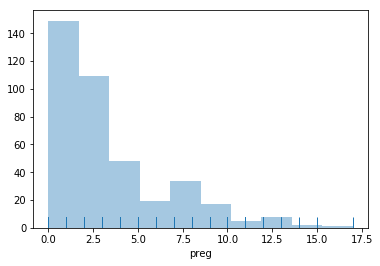

In [9]:
sns.distplot(diab_plot["preg"],bins=10,kde=False, rug=True)

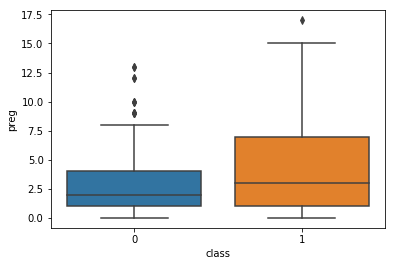

In [10]:
sns.boxplot(x="class", y="preg", data=diab_plot)

/Users/jill/anaconda3/envs/biopy/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


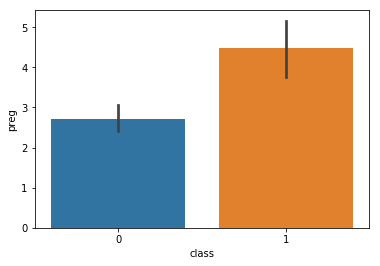

In [11]:
sns.barplot(x="class", y="preg", data=diab_plot)

([array([110.,  78.,  34.,  15.,  13.,   8.,   0.,   4.,   0.,   0.]),
  array([39., 31., 14.,  4., 21.,  9.,  5.,  4.,  2.,  1.])],
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 2 Lists of Patches objects>)

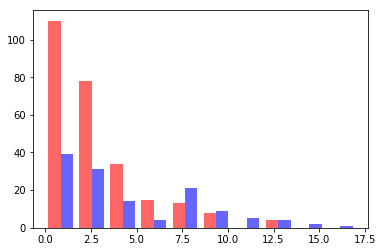

In [12]:
plt.hist([diab_plot.preg[diab_plot['class']==0],diab_plot.preg[diab_plot['class']==1]], color=['r','b'], alpha=0.6)

B. Distribution of "plas"

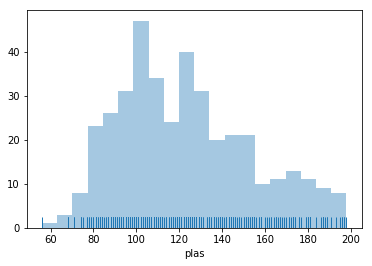

In [13]:
sns.distplot(diab_plot["plas"],bins=20,kde=False, rug=True)

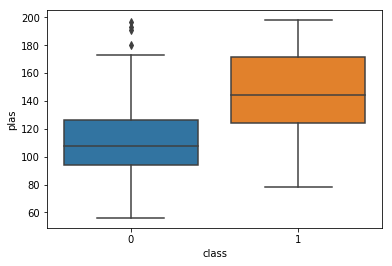

In [14]:
sns.boxplot(x="class", y="plas", data=diab_plot)

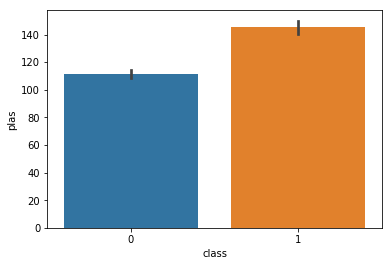

In [15]:
sns.barplot(x="class", y="plas", data=diab_plot)

([array([ 4., 29., 51., 67., 50., 27., 22.,  7.,  2.,  3.]),
  array([ 0.,  2.,  6., 14., 14., 24., 20., 14., 22., 14.])],
 array([ 56. ,  70.2,  84.4,  98.6, 112.8, 127. , 141.2, 155.4, 169.6,
        183.8, 198. ]),
 <a list of 2 Lists of Patches objects>)

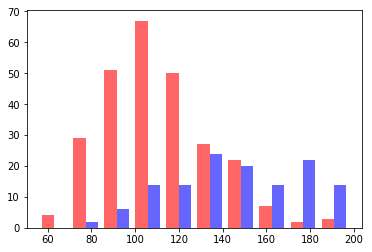

In [16]:
plt.hist([diab_plot.plas[diab_plot['class']==0],diab_plot.plas[diab_plot['class']==1]], color=['r','b'], alpha=0.6)

C.  Distribution of "pres"

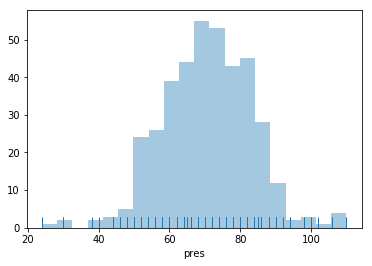

In [17]:
sns.distplot(diab_plot["pres"],bins=20,kde=False, rug=True)

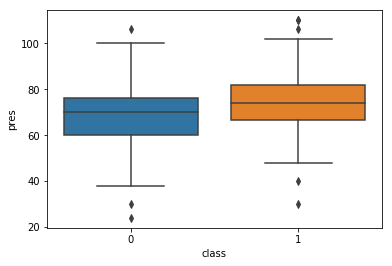

In [18]:
sns.boxplot(x="class", y="pres", data=diab_plot)

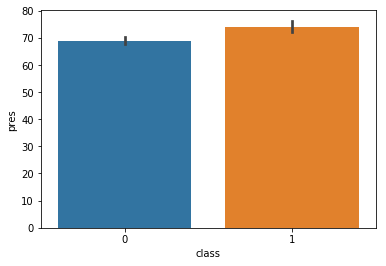

In [19]:
sns.barplot(x="class", y="pres", data=diab_plot)

([array([ 2.,  1.,  7., 41., 62., 74., 49., 22.,  3.,  1.]),
  array([ 1.,  1.,  1.,  9., 21., 34., 39., 18.,  2.,  4.])],
 array([ 24. ,  32.6,  41.2,  49.8,  58.4,  67. ,  75.6,  84.2,  92.8,
        101.4, 110. ]),
 <a list of 2 Lists of Patches objects>)

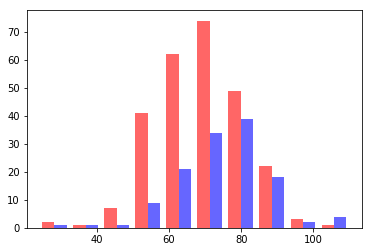

In [20]:
plt.hist([diab_plot.pres[diab_plot['class']==0],diab_plot.pres[diab_plot['class']==1]], color=['r','b'], alpha=0.6)

D. Distribution of "skin"

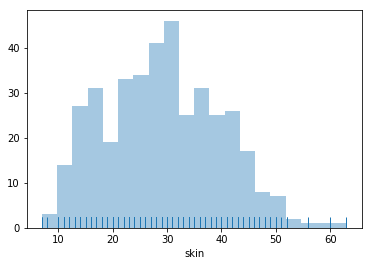

In [21]:
sns.distplot(diab_plot["skin"],bins=20,kde=False, rug=True)

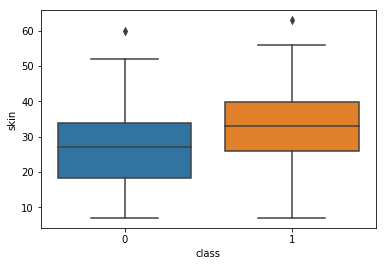

In [22]:
sns.boxplot(x="class", y="skin", data=diab_plot)

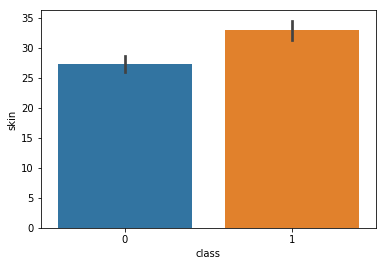

In [23]:
sns.barplot(x="class", y="skin", data=diab_plot)

([array([16., 50., 40., 48., 45., 30., 23.,  7.,  2.,  1.]),
  array([ 1.,  8., 12., 27., 26., 26., 20.,  8.,  1.,  1.])],
 array([ 7. , 12.6, 18.2, 23.8, 29.4, 35. , 40.6, 46.2, 51.8, 57.4, 63. ]),
 <a list of 2 Lists of Patches objects>)

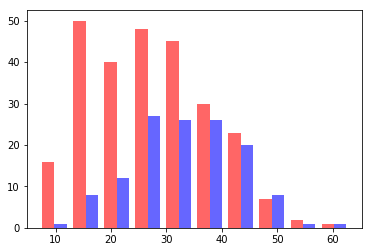

In [24]:
plt.hist([diab_plot.skin[diab_plot['class']==0],diab_plot.skin[diab_plot['class']==1]], color=['r','b'], alpha=0.6)

D. Distribution of "insu"

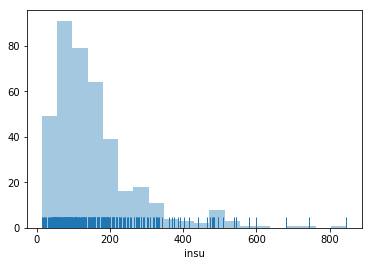

In [25]:
sns.distplot(diab_plot["insu"],bins=20,kde=False, rug=True)

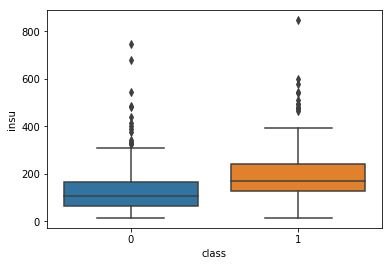

In [26]:
sns.boxplot(x="class", y="insu", data=diab_plot)

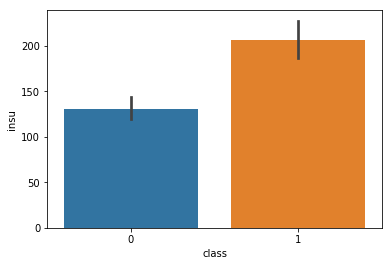

In [27]:
sns.barplot(x="class", y="insu", data=diab_plot)

([array([124.,  85.,  27.,  16.,   4.,   3.,   1.,   0.,   2.,   0.]),
  array([16., 58., 28., 13.,  3.,  7.,  3.,  1.,  0.,  1.])],
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <a list of 2 Lists of Patches objects>)

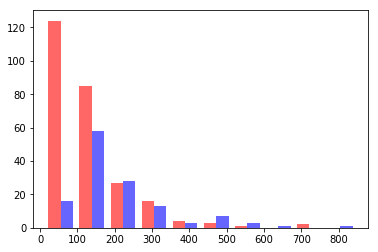

In [28]:
plt.hist([diab_plot.insu[diab_plot['class']==0],diab_plot.insu[diab_plot['class']==1]], color=['r','b'], alpha=0.6)

E. Distribution of "mass"

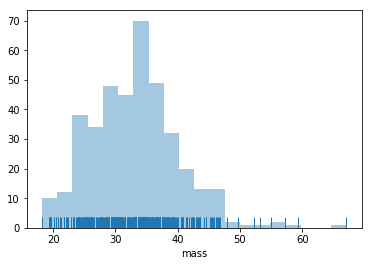

In [29]:
sns.distplot(diab_plot["mass"],bins=20,kde=False, rug=True)

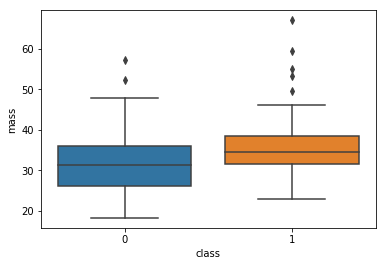

In [30]:
sns.boxplot(x="class", y="mass", data=diab_plot)

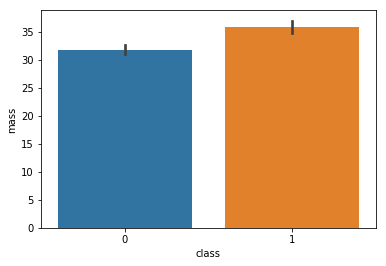

In [31]:
sns.barplot(x="class", y="mass", data=diab_plot)

([array([21., 62., 63., 67., 32., 14.,  2.,  1.,  0.,  0.]),
  array([ 1., 10., 30., 52., 20., 12.,  1.,  2.,  1.,  1.])],
 array([18.2 , 23.09, 27.98, 32.87, 37.76, 42.65, 47.54, 52.43, 57.32,
        62.21, 67.1 ]),
 <a list of 2 Lists of Patches objects>)

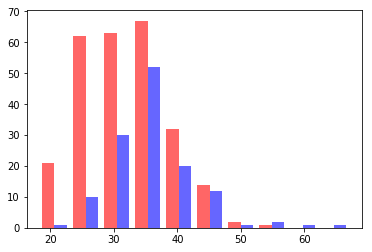

In [32]:
plt.hist([diab_plot.mass[diab_plot['class']==0],diab_plot.mass[diab_plot['class']==1]], color=['r','b'], alpha=0.6)

F. Distribution of "pedi"

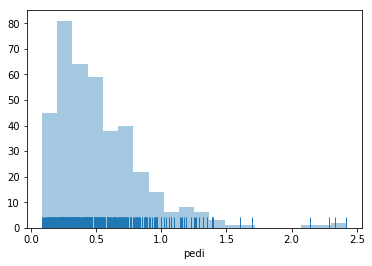

In [33]:
sns.distplot(diab_plot["pedi"],bins=20,kde=False, rug=True)

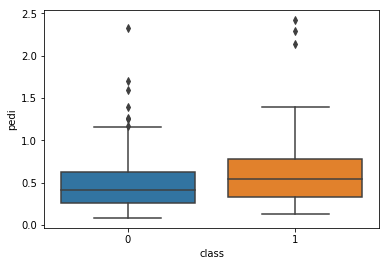

In [34]:
sns.boxplot(x="class", y="pedi", data=diab_plot)

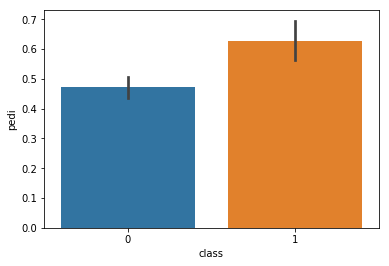

In [35]:
sns.barplot(x="class", y="pedi", data=diab_plot)

([array([98., 84., 48., 20.,  7.,  2.,  2.,  0.,  0.,  1.]),
  array([28., 39., 30., 16.,  7.,  7.,  0.,  0.,  1.,  2.])],
 array([0.085 , 0.3185, 0.552 , 0.7855, 1.019 , 1.2525, 1.486 , 1.7195,
        1.953 , 2.1865, 2.42  ]),
 <a list of 2 Lists of Patches objects>)

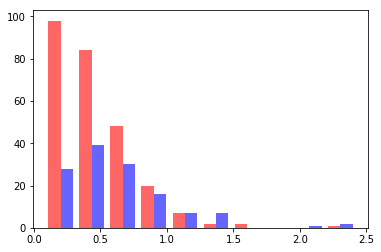

In [36]:
plt.hist([diab_plot.pedi[diab_plot['class']==0],diab_plot.pedi[diab_plot['class']==1]], color=['r','b'], alpha=0.6)

G. Distribution of "age"

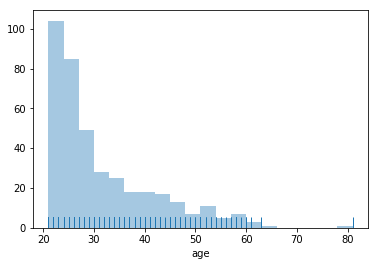

In [37]:
sns.distplot(diab_plot["age"],bins=20,kde=False, rug=True)

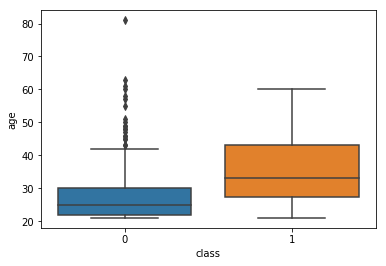

In [38]:
sns.boxplot(x="class", y="age", data=diab_plot)

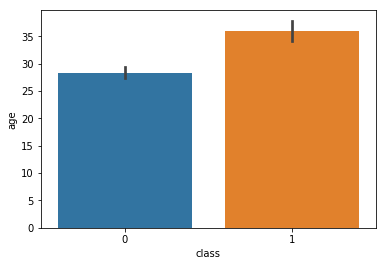

In [39]:
sns.barplot(x="class", y="age", data=diab_plot)

([array([159.,  46.,  22.,  17.,  10.,   2.,   4.,   1.,   0.,   1.]),
  array([30., 31., 21., 18., 10., 14.,  6.,  0.,  0.,  0.])],
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <a list of 2 Lists of Patches objects>)

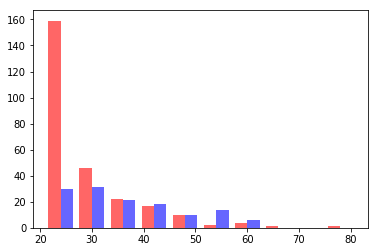

In [40]:
plt.hist([diab_plot.age[diab_plot['class']==0],diab_plot.age[diab_plot['class']==1]], color=['r','b'], alpha=0.6)

H. Distribution of "class"

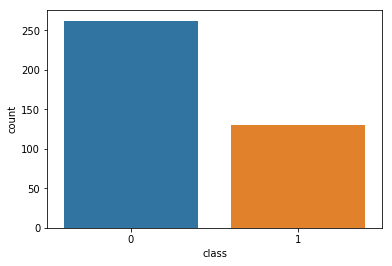

In [41]:
sns.countplot(x="class", data=diab_plot)

5. Creat plots to display the relationships between the variables.

The correlation plots indicates that there are positive correlation relationships between "skin" and "mass", "insu" and "plas".  

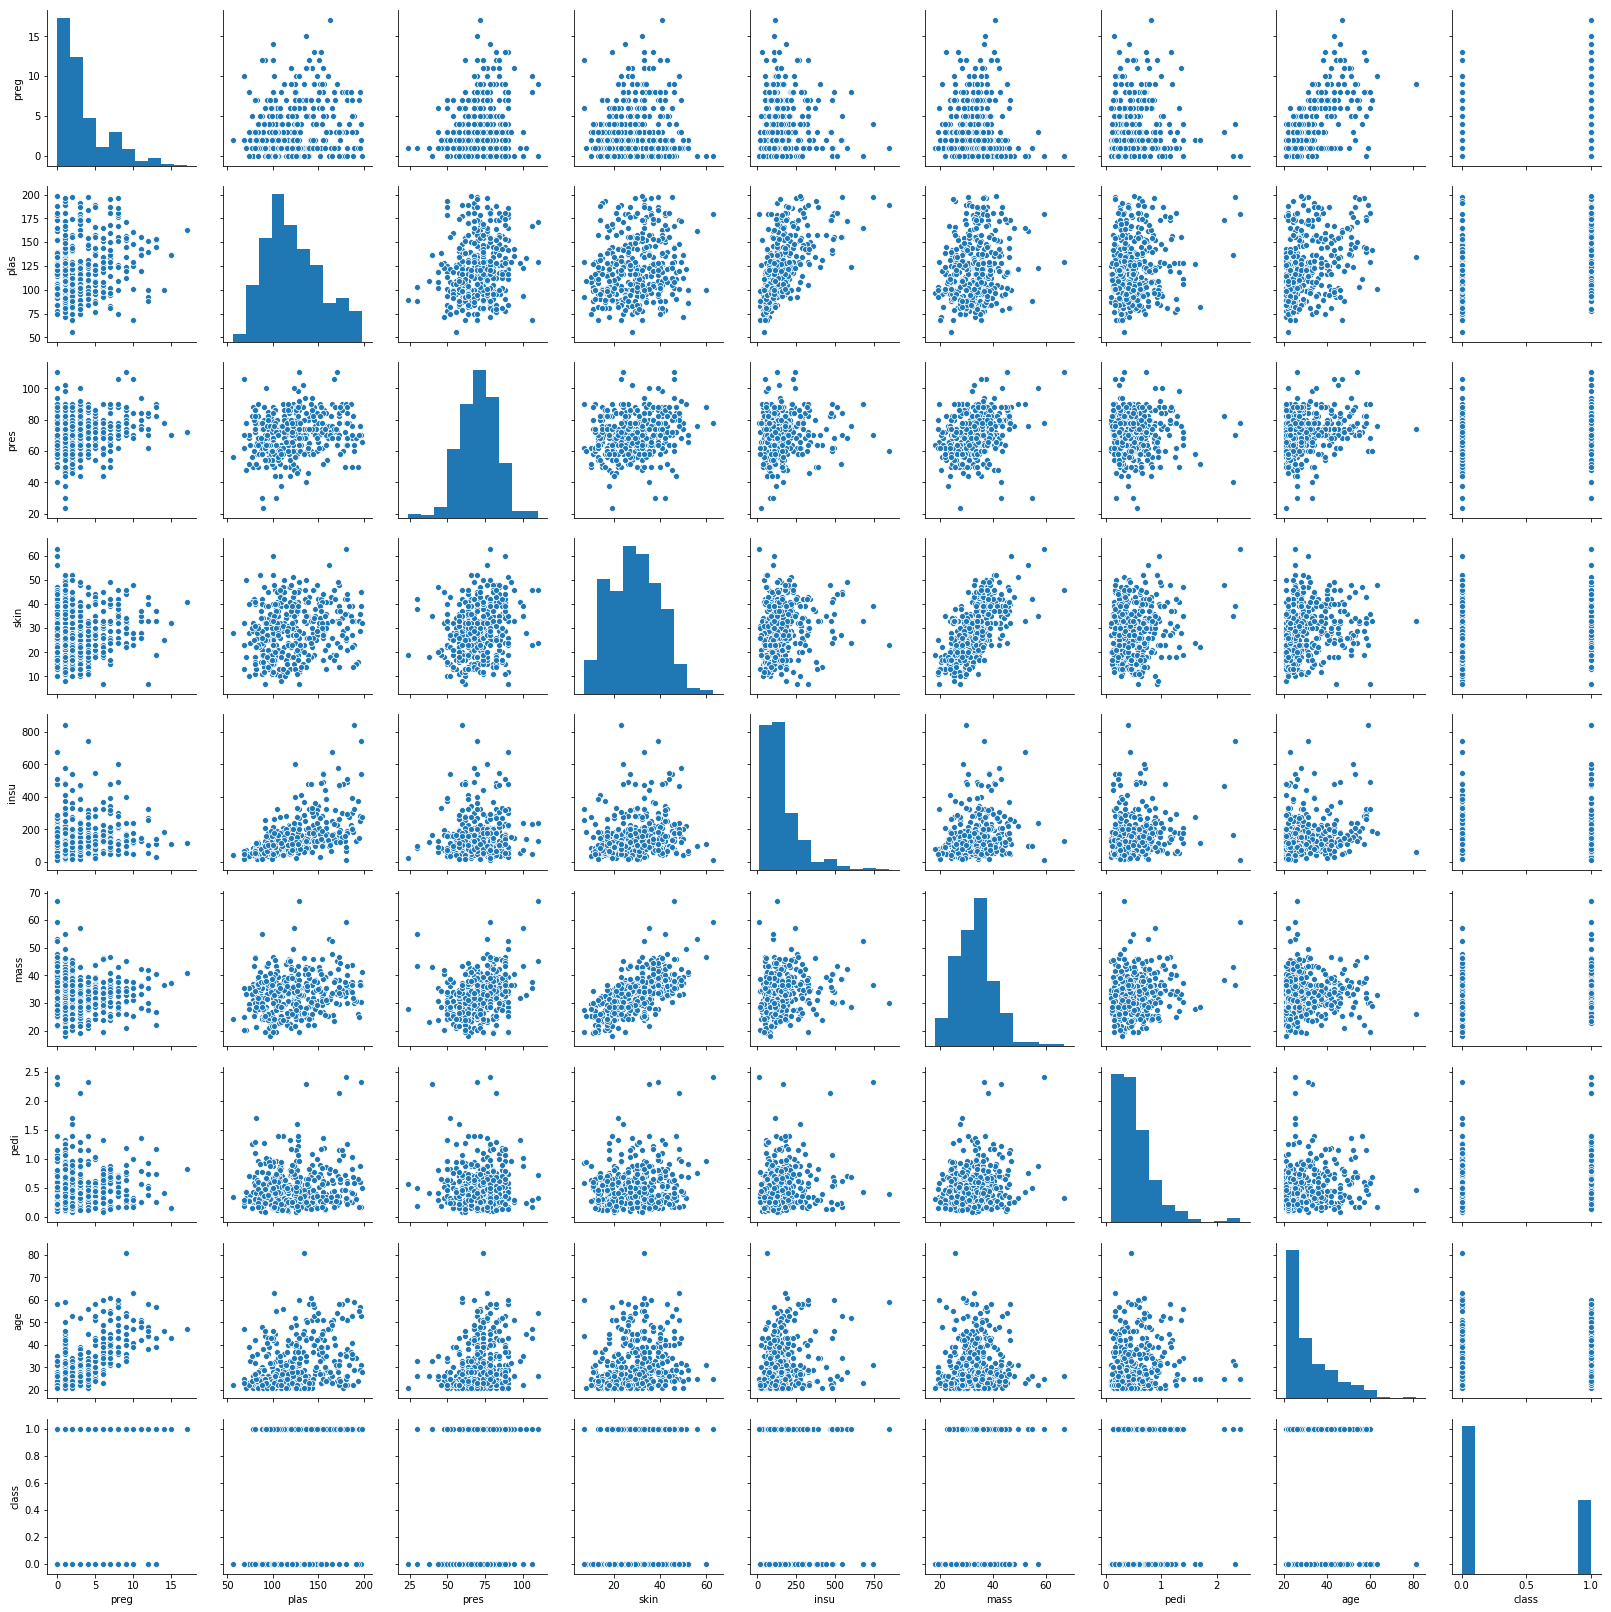

In [42]:
#sns.pairplot(df, dropna=True) #Error if there are NAs sin the data
sns.pairplot(diab_plot)

6. Calculate correlations between variables, confirm the variables which have strong correlations

The variables which have strong correlations: preg~age:0.67,skin~mass: 0.66, insu~plas: 0.58.
As insu and skin have huge Nans, and there are variables which have strong correlation with them, we can drop these two variables in the following machine learning part.

           preg      plas      pres      skin      insu      mass      pedi  \
preg   1.000000  0.198291  0.213355  0.093209  0.078984 -0.025347  0.007562   
plas   0.198291  1.000000  0.210027  0.198856  0.581223  0.209516  0.140180   
pres   0.213355  0.210027  1.000000  0.232571  0.098512  0.304403 -0.015971   
skin   0.093209  0.198856  0.232571  1.000000  0.182199  0.664355  0.160499   
insu   0.078984  0.581223  0.098512  0.182199  1.000000  0.226397  0.135906   
mass  -0.025347  0.209516  0.304403  0.664355  0.226397  1.000000  0.158771   
pedi   0.007562  0.140180 -0.015971  0.160499  0.135906  0.158771  1.000000   
age    0.679608  0.343641  0.300039  0.167761  0.217082  0.069814  0.085029   
class  0.256566  0.515703  0.192673  0.255936  0.301429  0.270118  0.209330   

            age     class  
preg   0.679608  0.256566  
plas   0.343641  0.515703  
pres   0.300039  0.192673  
skin   0.167761  0.255936  
insu   0.217082  0.301429  
mass   0.069814  0.270118  
pedi   0.0850

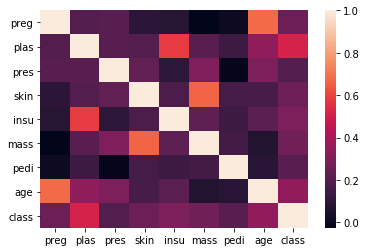

In [43]:
corr = diab_plot.corr()
print corr
# plot the heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)
# the variables which have strong correlations: preg~age:0.67,skin~mass: 0.66, insu~plas: 0.58.

7. Plot the variables which have strong correlation.

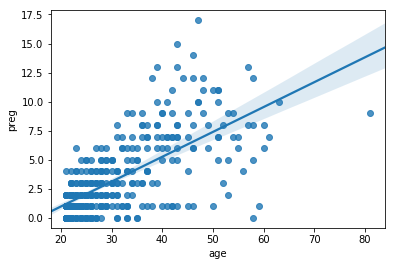

In [44]:
sns.regplot(x="age", y="preg", data=diab_plot)

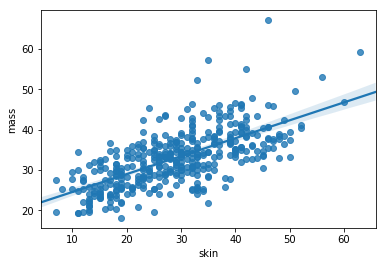

In [45]:
sns.regplot(x="skin", y="mass", data=diab_plot)

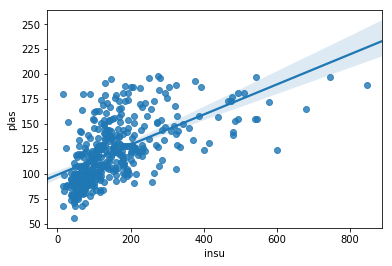

In [46]:
sns.regplot(x="insu", y="plas", data=diab_plot)